# Day and Night Image Classifier
---

We're trying to build a classifier that can accurately label these images as day or night, and that relies on finding distinguishing features between the two types of images!


### Import resources

Before we get started on the project code, import the libraries that we'll need.

In [2]:
import os
import glob
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import random
import numpy as np

In [3]:
image_dir_training = "images/training/"
image_dir_test = "images/test/"

## Step 1: Load the datasets and visualize

These first few lines of code will load the training day/night images and store all of them in a variable, `IMAGE_LIST`. This list contains the images and their associated label ("day" or "night"). 

For example, the first image-label pair in `IMAGE_LIST` can be accessed by index: 
``` IMAGE_LIST[0][:]```.


In [4]:
def load_dataset(image_dir):
    '''This function loads in images and their labels and places them in a list
    im_list[0][:] will be the first image-label pair in the list'''
    
    im_list = []
    image_types = ["day", "night"]
    
    for im_type in image_types:
        for file in glob.glob(os.path.join(image_dir, im_type, "*")):
            im = mpimg.imread(file)

            if not im is None:
                im_list.append((im, im_type))
    
    return im_list

In [5]:
IMAGE_LIST = load_dataset(image_dir_training)

## Step 2: Preprocess the data input images.

This function takes in a list of image-label pairs and outputs a **standardized** list of resized images and numerical labels.
1. Resizing every image to a standard size
2. Encode the target variables

In [6]:
def standardize_input(image):
    standard_im = cv2.resize(image, (1100, 600))
    
    return standard_im

In [7]:
def encode(label):
    return 1 if label == 'day' else 0

In [10]:
def preprocess(image_list):
    standard_list = []
    
    for item in image_list:
        image = item[0]
        label = item[1]
        
        standardized_im = standardize_input(image)
        
        binary_label = encode(label)
        
        standard_list.append((standardized_im, binary_label))
    
    return standard_list

In [11]:
STANDARDIZED_LIST = preprocess(IMAGE_LIST)

Shape: (600, 1100, 3)
Label [1 = day, 0 = night]: 1


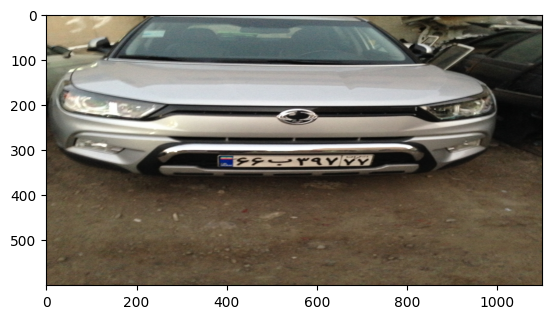

In [12]:
image_num = 0
selected_image = STANDARDIZED_LIST[image_num][0]
selected_label = STANDARDIZED_LIST[image_num][1]

plt.imshow(selected_image)
print("Shape: "+str(selected_image.shape))
print("Label [1 = day, 0 = night]: " + str(selected_label))

## Step 3: Feature Extraction

Let's try to create a feature that represents the brightness in an image. We'll be extracting the **average brightness** using HSV colorspace. Specifically, we'll use the V channel (a measure of brightness), add up the pixel values in the V channel, then divide that sum by the area of the image to get the average Value of the image.


In [13]:
def avg_brightness(rgb_image):
    hsv = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2HSV)

    sum_brightness = np.sum(hsv[:,:,2])
    area = 600 * 1100.0
    
    avg = sum_brightness/area
    
    return avg

Avg brightness: 106.87284696969697


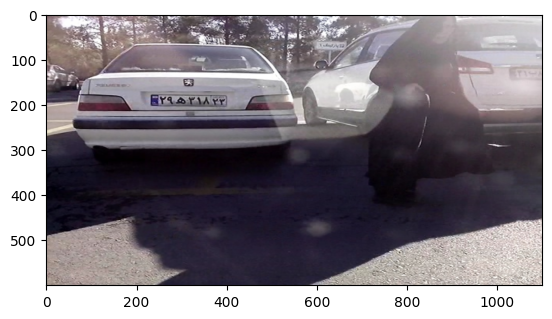

In [22]:
image_num = 190
test_im = STANDARDIZED_LIST[image_num][0]

avg = avg_brightness(test_im)

print('Avg brightness: ' + str(avg))

plt.imshow(test_im)

## Step 4: Build the classifier

We'll turn our average brightness feature into a classifier that takes in a standardized image and returns a `predicted_label` for that image. This `estimate_label` function should return a value: 0 or 1 (night or day, respectively).

In [15]:
def estimate_label(rgb_image, threshold):
    avg = avg_brightness(rgb_image)
        
    predicted_label = 0

    if avg > threshold:
        predicted_label = 1
    
    return predicted_label    

## Step 5: Evaluate the Classifier and Optimize

Here is where we test your classification algorithm using our test set of data that we set aside at the beginning of the notebook!
Below, we load in the test dataset, standardize it using the `standardize` function you defined above, and then **shuffle** it; this ensures that order will not play a role in testing accuracy.


In [16]:
TEST_IMAGE_LIST = load_dataset(image_dir_test)

STANDARDIZED_TEST_LIST = preprocess(TEST_IMAGE_LIST)

random.shuffle(STANDARDIZED_TEST_LIST)

In [17]:
def get_misclassified_images(test_images, threshold):
    misclassified_images_labels = []

    for image in test_images:

        im = image[0]
        true_label = image[1]

        predicted_label = estimate_label(im, threshold)

        if predicted_label != true_label:
            misclassified_images_labels.append((im, predicted_label, true_label))
            
    return misclassified_images_labels

In [18]:
MISCLASSIFIED = get_misclassified_images(STANDARDIZED_TEST_LIST, threshold=99)

total = len(STANDARDIZED_TEST_LIST)
num_correct = total - len(MISCLASSIFIED)
accuracy = num_correct/total

print('Accuracy: ' + str(accuracy))
print("Number of misclassified images = " + str(len(MISCLASSIFIED)) +' out of '+ str(total))

Accuracy: 0.8789473684210526
Number of misclassified images = 276 out of 2280



## Conclusion

We received an accuracy of **93.75%** by using only one feature extraction, i.e the average brightness of the image. We could work more on this, for example features that involve the other 2 Hue and Saturation channels to extract more features.
This concludes that most simple problems can be solved using traditional image processing, and doesn't need Advanced Deep Learning concepts always.
